In [1]:
#202331106_istydaniahusen
import cv2
import numpy as np
from matplotlib import pyplot as plt

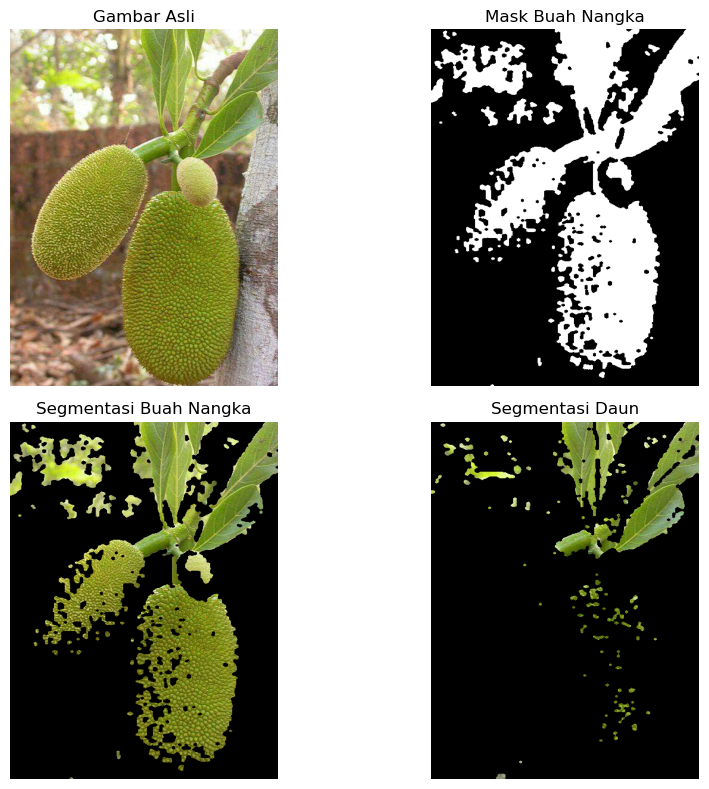

In [2]:
#202331106_istydaniahusen
image = cv2.imread('nangka.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Warna khas buah nangka
lower_nangka = np.array([30, 60, 60])
upper_nangka = np.array([60, 255, 255])
mask_nangka = cv2.inRange(hsv, lower_nangka, upper_nangka)

# Bersihkan mask buah nangka
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_nangka_clean = cv2.morphologyEx(mask_nangka, cv2.MORPH_OPEN, kernel)
mask_nangka_clean = cv2.morphologyEx(mask_nangka_clean, cv2.MORPH_CLOSE, kernel)

# Segmentasi buah nangka (RGB)
segment_nangka = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_nangka_clean)

lower_leaf = np.array([35, 40, 40])
upper_leaf = np.array([85, 255, 255])
mask_leaf = cv2.inRange(hsv, lower_leaf, upper_leaf)

# Bersihkan mask daun
mask_leaf_clean = cv2.morphologyEx(mask_leaf, cv2.MORPH_OPEN, kernel)
mask_leaf_clean = cv2.morphologyEx(mask_leaf_clean, cv2.MORPH_CLOSE, kernel)

# Segmentasi daun (RGB)
segment_leaf = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_leaf_clean)

titles = ['Gambar Asli', 'Mask Buah Nangka', 'Segmentasi Buah Nangka', 'Segmentasi Daun']
images = [image_rgb, mask_nangka_clean, segment_nangka, segment_leaf]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    if i == 1:
        plt.imshow(images[i], cmap='gray')  # Mask ditampilkan dalam grayscale
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()